# モジュールを読み込み

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import xlrd
import glob
import sys
import shutil

# 強度データを読み込み

In [ ]:
df = pd.read_excel('ベストトラックデータ.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9660 entries, 0 to 9659
Data columns (total 7 columns):
年     9660 non-null object
月     9658 non-null float64
日     9658 non-null float64
時間    9658 non-null float64
号数    9658 non-null float64
風速    9658 non-null object
強度    9379 non-null object
dtypes: float64(4), object(3)
memory usage: 528.4+ KB


In [ ]:
df.fillna(0, inplace=True)
df.loc[:10,['強度']]

,強度
0,0
1,表現しない
2,表現しない
3,表現しない
4,表現しない
5,表現しない
6,表現しない
7,強い
8,強い
9,強い


In [ ]:
print(df.iloc[:10][['強度']].dropna(how='any'))

      強度
0      0
1  表現しない
2  表現しない
3  表現しない
4  表現しない
5  表現しない
6  表現しない
7     強い
8     強い
9     強い


In [ ]:
df.loc[:,'強度']

0         NaN
1       表現しない
2       表現しない
3       表現しない
4       表現しない
5       表現しない
6       表現しない
7          強い
8          強い
9          強い
10         強い
11         強い
12      非常に強い
13      非常に強い
14      非常に強い
15      非常に強い
16      非常に強い
17      非常に強い
18      非常に強い
19      非常に強い
20      非常に強い
21         強い
22      表現しない
23      表現しない
24        NaN
25      表現しない
26      表現しない
27      表現しない
28      表現しない
29      表現しない
        ...  
9630    表現しない
9631       強い
9632       強い
9633       強い
9634    非常に強い
9635      猛烈な
9636      猛烈な
9637      猛烈な
9638      猛烈な
9639      猛烈な
9640      猛烈な
9641      猛烈な
9642      猛烈な
9643      猛烈な
9644      猛烈な
9645      猛烈な
9646      猛烈な
9647      猛烈な
9648      猛烈な
9649      猛烈な
9650      猛烈な
9651      猛烈な
9652      猛烈な
9653    非常に強い
9654       強い
9655    表現しない
9656    表現しない
9657    表現しない
9658    表現しない
9659    表現しない
Name: 強度, Length: 9660, dtype: object

In [ ]:
Wb = xlrd.open_workbook('C:/Users/adachiyoshitaka/Desktop/second assignment/ベストトラックデータ.xlsx')
#シートを指定
Sheet_1 = Wb.sheet_by_name('Sheet1')

#シートの最終行を取得
Sheet_Max = Sheet_1.nrows

#配列宣言
Strength = []

#シートの2行目~最終行をループ
for i in range(1,Sheet_Max):

    #G列を配列へ格納
    Strength.append(Sheet_1.cell_value(i,6))

print(Strength)

['', '表現しない', '表現しない', '表現しない', '表現しない', '表現しない', '表現しない', '強い', '強い', '強い', '強い', '強い', '非常に強い', '非常に強い', '非常に強い', '非常に強い', '非常に強い', '非常に強い', '非常に強い', '非常に強い', '非常に強い', '強い', '表現しない', '表現しない', '', '表現しない', '表現しない', '表現しない', '表現しない', '表現しない', '表現しない', '表現しない', '表現しない', '表現しない', '表現しない', '表現しない', '表現しない', '強い', '強い', '強い', '非常に強い', '非常に強い', '猛烈な', '猛烈な', '非常に強い', '強い', '強い', '表現しない', '表現しない', '表現しない', '表現しない', '表現しない', '表現しない', '表現しない', '表現しない', '', '表現しない', '表現しない', '表現しない', '表現しない', '表現しない', '表現しない', '表現しない', '強い', '非常に強い', '猛烈な', '猛烈な', '猛烈な', '猛烈な', '猛烈な', '猛烈な', '猛烈な', '猛烈な', '猛烈な', '猛烈な', '猛烈な', '猛烈な', '猛烈な', '猛烈な', '猛烈な', '非常に強い', '表現しない', '表現しない', '表現しない', '表現しない', '表現しない', '表現しない', '表現しない', '表現しない', '', '表現しない', '表現しない', '表現しない', '表現しない', '表現しない', '表現しない', '強い', '非常に強い', '非常に強い', '猛烈な', '猛烈な', '猛烈な', '猛烈な', '猛烈な', '猛烈な', '猛烈な', '猛烈な', '猛烈な', '猛烈な', '猛烈な', '猛烈な', '猛烈な', '猛烈な', '猛烈な', '猛烈な', '猛烈な', '猛烈な', '猛烈な', '猛烈な', '猛烈な', '猛烈な', '猛烈な', '猛烈な', '猛烈な', '猛烈な', '猛烈な', '猛烈な', '猛烈な'

# 画像データを読み込み

In [ ]:
import os

print("join(): " + os.path.join("/A/B/C", "type.py"))

join(): /A/B/C\type.py


In [ ]:
path = 'C:/Users/adachiyoshitaka/Desktop/second assignment/image data'
DATADIR = "C:/Users/adachiyoshitaka/Desktop/second assignment/image data"
CATEGORIES = os.listdir(path)

In [ ]:
print(CATEGORIES)

['d201501', 'd201502', 'd201503', 'd201504', 'd201505', 'd201506', 'd201507', 'd201508', 'd201509', 'd201510', 'd201511', 'd201512', 'd201513', 'd201514', 'd201515', 'd201516', 'd201517', 'd201518', 'd201519', 'd201520', 'd201521', 'd201522', 'd201523', 'd201524', 'd201525', 'd201526', 'd201527', 'd201601', 'd201602', 'd201603', 'd201604', 'd201605', 'd201606', 'd201607', 'd201608', 'd201609', 'd201610', 'd201611', 'd201612', 'd201613', 'd201614', 'd201615', 'd201616', 'd201617', 'd201618', 'd201619', 'd201620', 'd201621', 'd201622', 'd201623', 'd201624', 'd201625', 'd201626']


In [ ]:
CATEGORIES[0]

'd201501'

<class 'str'>


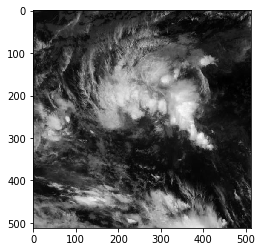

(512, 512)
[[ 28  29  32 ...  40  70  76]
 [ 37  37  39 ...  46  75  86]
 [ 35  35  36 ...  65  90 106]
 ...
 [148 145 140 ...   9  10  13]
 [147 147 144 ...  10  11  13]
 [144 146 147 ...  10  11  13]]


In [ ]:
path = 'C:/Users/adachiyoshitaka/Desktop/second assignment/image data'
DATADIR = "C:/Users/adachiyoshitaka/Desktop/second assignment/image data"
CATEGORIES = os.listdir(path)
for category in CATEGORIES:
    print(type(category))
    path = os.path.join(DATADIR, category)
    for image_name in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, image_name), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break
  
print(img_array.shape)
print(img_array)

In [ ]:
path = 'C:/Users/adachiyoshitaka/Desktop/second assignment/image data'
DATADIR = "C:/Users/adachiyoshitaka/Desktop/second assignment/image data"
CATEGORIES = os.listdir(path)
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for image_name in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, image_name), cv2.IMREAD_GRAYSCALE)
        plt.show()
        break
  
print(img_array)

[[  6   6   6 ...   7   7   6]
 [  6   6   6 ...   7   6   6]
 [  6   6   6 ...   7   6   6]
 ...
 [109 109 109 ... 149 150 149]
 [ 97 101 105 ... 137 137 137]
 [ 84  92 100 ... 126 124 122]]


# 画像にラベル付け

In [ ]:
from PIL import Image
def read_image():

    # 設定パラメータ
    class_n = 2   # クラス数
    x = []        # 画像データ用
    y = []        # ラベルデータ用

    # ファイルの保存先を指定（ファイルの拡張子は.npz）
    outfile ="C:/Users/adachiyoshitaka/Desktop/second assignment" + str("224px_") + str(class_n) +  ".npz"

    # path 以下の画像を読み込む
    def glob_files(path, label):
        files = glob.glob(path + "/*.jpg")  # pathにある画像を読み込む

        # 各ファイルを処理
        num = 0
        for f in files:
            if num >= len(files): break
            num += 1
            # 画像ファイルを読む
            img = img_array.shape.open(f)   # Pillow(PIL)で画像読込み。色順番はRGB
            img = np.asarray(img)  # ndarray化
            #img = cv2.resize(img, (224, 224), cv2.INTER_LANCZOS4)  # 画像サイズを224px × 224pxにする
            
            # 画像データ(img)とラベルデータ(label)をx, y のそれぞれのリストに保存
            x.append(img)
            y.append(df)

    i = 0
    for i in range(class_n):
        glob_files("C:/Users/adachiyoshitaka/Desktop/second assignment/image data" + str(i), i)  # 各画像のフォルダーを読む
        print("file: " + str(i))

# フォルダとして出力

In [ ]:
### ファイルへ保存 ###
# npzで作成する場合
    np.savez(outfile, x=x, y=y)
    print("npzファイルを保存しました :" + outfile, len(x))

if __name__ == '__main__':
    read_image()

IndentationError: unexpected indent (<ipython-input-15-dc05201cec2c>, line 3)

In [ ]:
if y="表現しない":
    
elif y="強い":
    
elif y="非常に強い"

else:
   

# 画像ファイルから台風の強度を判別

In [ ]:
df = pd.read_excel('ベストトラックデータ.xlsx')
df.fillna(0, inplace=True)
df.loc[:,['強度']]

,強度
0,0
1,熱帯低気圧
2,熱帯低気圧
3,熱帯低気圧
4,熱帯低気圧
5,熱帯低気圧
6,熱帯低気圧
7,表現しない
8,表現しない
9,表現しない


In [ ]:
df = pd.read_excel('ベストトラックデータ.xlsx')
df.dropna(inplace=True)
df.loc[:,['強度']]

,強度
1,熱帯低気圧
2,熱帯低気圧
3,熱帯低気圧
4,熱帯低気圧
5,熱帯低気圧
6,熱帯低気圧
7,表現しない
8,表現しない
9,表現しない
10,表現しない


In [ ]:
df.columns

Index(['年', '月', '日', '時間', '号数', '風速', '強度'], dtype='object')

In [ ]:
path = 'C:/Users/adachiyoshitaka/Desktop/second assignment/image data'
DATADIR = "C:/Users/adachiyoshitaka/Desktop/second assignment/image data"
CATEGORIES = os.listdir(path) #ファイル・ディレクトリの一覧を取得
for category in CATEGORIES: #CATEGORIESからcategoryとして一つずつ書き出し
    path = os.path.join(DATADIR, category) #os.path.joinモジュールでDATADIRとcategoryを結合
    for image_name in os.listdir(path): #pathからimage_nameとして一つずつ書き出し
        print(image_name)

2015011300-201501-MTS2-1.h5.jpg
2015011306-201501-MTS2-1.h5.jpg
2015011312-201501-MTS2-1.h5.jpg
2015011318-201501-MTS2-1.h5.jpg
2015011400-201501-MTS2-1.h5.jpg
2015011406-201501-MTS2-1.h5.jpg
2015011412-201501-MTS2-1.h5.jpg
2015011418-201501-MTS2-1.h5.jpg
2015011500-201501-MTS2-1.h5.jpg
2015011506-201501-MTS2-1.h5.jpg
2015011512-201501-MTS2-1.h5.jpg
2015011518-201501-MTS2-1.h5.jpg
2015011600-201501-MTS2-1.h5.jpg
2015011606-201501-MTS2-1.h5.jpg
2015011612-201501-MTS2-1.h5.jpg
2015011618-201501-MTS2-1.h5.jpg
2015011700-201501-MTS2-1.h5.jpg
2015011706-201501-MTS2-1.h5.jpg
2015011712-201501-MTS2-1.h5.jpg
2015011718-201501-MTS2-1.h5.jpg
2015011800-201501-MTS2-1.h5.jpg
2015011806-201501-MTS2-1.h5.jpg
2015011812-201501-MTS2-1.h5.jpg
2015011818-201501-MTS2-1.h5.jpg
2015011900-201501-MTS2-1.h5.jpg
2015011906-201501-MTS2-1.h5.jpg
2015011912-201501-MTS2-1.h5.jpg
2015011918-201501-MTS2-1.h5.jpg
2015012000-201501-MTS2-1.h5.jpg
2015012006-201501-MTS2-1.h5.jpg
2015012012-201501-MTS2-1.h5.jpg
20150120

2015101512-201524-HMW8-1.h5.jpg
2015101518-201524-HMW8-1.h5.jpg
2015101600-201524-HMW8-1.h5.jpg
2015101606-201524-HMW8-1.h5.jpg
2015101612-201524-HMW8-1.h5.jpg
2015101618-201524-HMW8-1.h5.jpg
2015101700-201524-HMW8-1.h5.jpg
2015101706-201524-HMW8-1.h5.jpg
2015101712-201524-HMW8-1.h5.jpg
2015101718-201524-HMW8-1.h5.jpg
2015101800-201524-HMW8-1.h5.jpg
2015101806-201524-HMW8-1.h5.jpg
2015101812-201524-HMW8-1.h5.jpg
2015101818-201524-HMW8-1.h5.jpg
2015101900-201524-HMW8-1.h5.jpg
2015101906-201524-HMW8-1.h5.jpg
2015101912-201524-HMW8-1.h5.jpg
2015101918-201524-HMW8-1.h5.jpg
2015102000-201524-HMW8-1.h5.jpg
2015102006-201524-HMW8-1.h5.jpg
2015102012-201524-HMW8-1.h5.jpg
2015102018-201524-HMW8-1.h5.jpg
2015102100-201524-HMW8-1.h5.jpg
2015102106-201524-HMW8-1.h5.jpg
2015101300-201525-HMW8-1.h5.jpg
2015101306-201525-HMW8-1.h5.jpg
2015101312-201525-HMW8-1.h5.jpg
2015101318-201525-HMW8-1.h5.jpg
2015101400-201525-HMW8-1.h5.jpg
2015101406-201525-HMW8-1.h5.jpg
2015101412-201525-HMW8-1.h5.jpg
20151014

In [ ]:
path = 'C:/Users/adachiyoshitaka/Desktop/second assignment/image data'
DATADIR = "C:/Users/adachiyoshitaka/Desktop/second assignment/image data"
CATEGORIES = os.listdir(path) #ファイル・ディレクトリの一覧を取得
for category in CATEGORIES: #CATEGORIESからcategoryとして一つずつ書き出し
    path = os.path.join(DATADIR, category) #os.path.joinモジュールでDATADIRとcategoryを結合
    for image_name in os.listdir(path): #pathからimage_nameとして一つずつ書き出し
        new_path = os.path.join(path, image_name) #os.path.joinモジュールでpathとimage_nameを結合
        target = df[(df.loc[:,'年'] == int(image_name[2:4])) 
                 & (df.loc[:,'月'] == int(image_name[4:6])) 
                 & (df.loc[:,'日'] == int(image_name[6:8])) 
                 & (df.loc[:,'時間'] == int(image_name[8:10]))#もう一個条件が必要
                 & (df.loc[:,'号数'] == int(image_name[15:17]))]
        if os.path.exists(new_path) == True:#もしnew_pathが存在するなら
            try:
                if target.loc[:,'強度'].reset_index(drop = True)[0] == "表現しない":#もし強度が「表現しない」なら
                    shutil.copy(new_path, 'C:/Users/adachiyoshitaka/Desktop/second assignment/0/')#フォルダ”０”へ画像を移動
                elif target.loc[:,'強度'].reset_index(drop = True)[0] == "強い":#もし強度が「強い」なら
                    shutil.copy(new_path, 'C:/Users/adachiyoshitaka/Desktop/second assignment/1/')#フォルダ”1”へ画像を移動
                elif target.loc[:,'強度'].reset_index(drop = True)[0] == "非常に強い":#もし強度が「非常に強い」なら
                    shutil.copy(new_path, 'C:/Users/adachiyoshitaka/Desktop/second assignment/2/')#フォルダ”2”へ画像を移動
                elif target.loc[:,'強度'].reset_index(drop = True)[0] == "猛烈な":#もし強度が「猛烈な」なら
                    shutil.copy(new_path, 'C:/Users/adachiyoshitaka/Desktop/second assignment/3/')#フォルダ”3”へ画像を移動
            except:
                print(target)

Empty DataFrame
Columns: [年, 月, 日, 時間, 号数, 風速, 強度]
Index: []
Empty DataFrame
Columns: [年, 月, 日, 時間, 号数, 風速, 強度]
Index: []
Empty DataFrame
Columns: [年, 月, 日, 時間, 号数, 風速, 強度]
Index: []
Empty DataFrame
Columns: [年, 月, 日, 時間, 号数, 風速, 強度]
Index: []
Empty DataFrame
Columns: [年, 月, 日, 時間, 号数, 風速, 強度]
Index: []
Empty DataFrame
Columns: [年, 月, 日, 時間, 号数, 風速, 強度]
Index: []
Empty DataFrame
Columns: [年, 月, 日, 時間, 号数, 風速, 強度]
Index: []
Empty DataFrame
Columns: [年, 月, 日, 時間, 号数, 風速, 強度]
Index: []
Empty DataFrame
Columns: [年, 月, 日, 時間, 号数, 風速, 強度]
Index: []
Empty DataFrame
Columns: [年, 月, 日, 時間, 号数, 風速, 強度]
Index: []
Empty DataFrame
Columns: [年, 月, 日, 時間, 号数, 風速, 強度]
Index: []
Empty DataFrame
Columns: [年, 月, 日, 時間, 号数, 風速, 強度]
Index: []
Empty DataFrame
Columns: [年, 月, 日, 時間, 号数, 風速, 強度]
Index: []
Empty DataFrame
Columns: [年, 月, 日, 時間, 号数, 風速, 強度]
Index: []


In [ ]:
path = 'D:/Earth班/orijinal_data/normal_dataset'
DATADIR = "D:/Earth班/orijinal_data/normal_dataset"
CATEGORIES = os.listdir(path) #ファイル・ディレクトリの一覧を取得
for category in CATEGORIES: #CATEGORIESからcategoryとして一つずつ書き出し
    path = os.path.join(DATADIR, category) #os.path.joinモジュールでDATADIRとcategoryを結合
    for image_name in os.listdir(path): #pathからimage_nameとして一つずつ書き出し
        new_path = os.path.join(path, image_name) #os.path.joinモジュールでpathとimage_nameを結合
        target = df[(df.loc[:,'年'] == int(image_name[2:4])) 
                 & (df.loc[:,'月'] == int(image_name[4:6])) 
                 & (df.loc[:,'日'] == int(image_name[6:8])) 
                 & (df.loc[:,'時間'] == int(image_name[8:10]))#もう一個条件が必要
                 & (df.loc[:,'号数'] == int(image_name[15:17]))]
        if os.path.exists(new_path) == True:#もしnew_pathが存在するなら
            try:
                if target.loc[:,'強度'].reset_index(drop = True)[0] == "表現しない":#もし強度が「表現しない」なら
                    shutil.copy(new_path, 'C:/Users/adachiyoshitaka/Desktop/training_dataset/0/')#フォルダ”０”へ画像を移動
                elif target.loc[:,'強度'].reset_index(drop = True)[0] == "強い":#もし強度が「強い」なら
                    shutil.copy(new_path, 'C:/Users/adachiyoshitaka/Desktop/training_dataset/1/')#フォルダ”1”へ画像を移動
                elif target.loc[:,'強度'].reset_index(drop = True)[0] == "非常に強い":#もし強度が「非常に強い」なら
                    shutil.copy(new_path, 'C:/Users/adachiyoshitaka/Desktop/training_dataset/2/')#フォルダ”2”へ画像を移動
                elif target.loc[:,'強度'].reset_index(drop = True)[0] == "猛烈な":#もし強度が「猛烈な」なら
                    shutil.copy(new_path, 'C:/Users/adachiyoshitaka/Desktop/training_dataset/3/')#フォルダ”3”へ画像を移動
            except:
                print(target)

Empty DataFrame
Columns: [年, 月, 日, 時間, 号数, 風速, 強度]
Index: []
Empty DataFrame
Columns: [年, 月, 日, 時間, 号数, 風速, 強度]
Index: []
Empty DataFrame
Columns: [年, 月, 日, 時間, 号数, 風速, 強度]
Index: []
Empty DataFrame
Columns: [年, 月, 日, 時間, 号数, 風速, 強度]
Index: []
Empty DataFrame
Columns: [年, 月, 日, 時間, 号数, 風速, 強度]
Index: []
Empty DataFrame
Columns: [年, 月, 日, 時間, 号数, 風速, 強度]
Index: []
Empty DataFrame
Columns: [年, 月, 日, 時間, 号数, 風速, 強度]
Index: []
Empty DataFrame
Columns: [年, 月, 日, 時間, 号数, 風速, 強度]
Index: []
Empty DataFrame
Columns: [年, 月, 日, 時間, 号数, 風速, 強度]
Index: []
Empty DataFrame
Columns: [年, 月, 日, 時間, 号数, 風速, 強度]
Index: []
Empty DataFrame
Columns: [年, 月, 日, 時間, 号数, 風速, 強度]
Index: []
Empty DataFrame
Columns: [年, 月, 日, 時間, 号数, 風速, 強度]
Index: []
Empty DataFrame
Columns: [年, 月, 日, 時間, 号数, 風速, 強度]
Index: []
Empty DataFrame
Columns: [年, 月, 日, 時間, 号数, 風速, 強度]
Index: []


In [ ]:
df[(df.loc[:,'年'] == 13) & (df.loc[:,'月'] == 1)]

,年,月,日,時間,号数,風速,強度
6005,13,1.0,1.0,0.0,1.0,0,表現しない
6006,13,1.0,1.0,6.0,1.0,0,表現しない
6007,13,1.0,1.0,12.0,1.0,0,表現しない
6008,13,1.0,1.0,18.0,1.0,0,表現しない
6009,13,1.0,2.0,0.0,1.0,0,表現しない
6010,13,1.0,2.0,6.0,1.0,0,表現しない
6011,13,1.0,2.0,12.0,1.0,0,表現しない
6012,13,1.0,2.0,18.0,1.0,0,表現しない
6013,13,1.0,3.0,0.0,1.0,0,表現しない
6014,13,1.0,3.0,6.0,1.0,0,表現しない


In [ ]:
df[]

,年,月,日,時間,号数,風速,強度
1,5,1.0,14.0,0.0,1.0,0,表現しない


In [ ]:
df

,年,月,日,時間,号数,風速,強度
1,5,1.0,14.0,0.0,1.0,0,表現しない
2,5,1.0,14.0,6.0,1.0,0,表現しない
3,5,1.0,14.0,12.0,1.0,0,表現しない
4,5,1.0,14.0,18.0,1.0,0,表現しない
5,5,1.0,15.0,0.0,1.0,0,表現しない
6,5,1.0,15.0,6.0,1.0,0,表現しない
7,5,1.0,15.0,12.0,1.0,35,強い
8,5,1.0,15.0,18.0,1.0,40,強い
9,5,1.0,16.0,0.0,1.0,40,強い
10,5,1.0,16.0,6.0,1.0,40,強い


In [ ]:
pd.concat([pd.DataFrame(image_names),df.強度],axis=1)

,0,強度
0,2015011300-201501-MTS2-1.h5.jpg,NaN
1,2015011306-201501-MTS2-1.h5.jpg,表現しない
2,2015011312-201501-MTS2-1.h5.jpg,表現しない
3,2015011318-201501-MTS2-1.h5.jpg,表現しない
4,2015011400-201501-MTS2-1.h5.jpg,表現しない
5,2015011406-201501-MTS2-1.h5.jpg,表現しない
6,2015011412-201501-MTS2-1.h5.jpg,表現しない
7,2015011418-201501-MTS2-1.h5.jpg,強い
8,2015011500-201501-MTS2-1.h5.jpg,強い
9,2015011506-201501-MTS2-1.h5.jpg,強い


In [ ]:
path = 'C:/Users/adachiyoshitaka/Desktop/second assignment/image data'
DATADIR = "C:/Users/adachiyoshitaka/Desktop/second assignment/image data"
CATEGORIES = os.listdir(path)
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for image_name in os.listdir(path):
        x = pd.DataFrame("data":["image_name"])
        print(x)

SyntaxError: invalid syntax (<ipython-input-145-058f773c3688>, line 7)

In [ ]:
x = []
x.append(image_name)

# numpy配列に変換
x = np.array(x)
y = np.array(df)

print(x.shape)
print(y.shape)

(1, 1)
(9378, 7)


In [ ]:
# numpy配列に変換
x = img_array
y = np.array(df)

print(x.shape)
print(y.shape)

(512, 512)
(9378, 7)


In [ ]:
http://192.168.212.34:9999/tree/Earth

SyntaxError: invalid syntax (<ipython-input-268-8dfeddbb9d80>, line 1)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import xlrd
import glob
import sys
import shutil

In [ ]:
df = pd.read_excel('ベストトラックデータ.xlsx')

In [ ]:
import numpy as np
X_train = np.load('train_feature_map.npy')
X_test = np.load('test_feature_map.npy')
y_train = np.load('train_file_name.npy')
y_test = np.load('test_file_name.npy')

In [ ]:
if int(y_test[2:4])==5:
    for image_data in y_test:
        target = df[(df.loc[:,'年'] == int(image_data[2:4])) 
            & (df.loc[:,'月'] == int(image_data[4:6])) 
            & (df.loc[:,'日'] == int(image_data[6:8])) 
            & (df.loc[:,'時間'] == int(image_data[8:10]))#もう一個条件が必要
            & (df.loc[:,'号数'] == int(image_data[15:17]))]

    print(target)
    #if target.loc[:,'年'].reset_index(drop = True)[0] == 15:#もしnew_pathが存在するなら
        #print(len(target))

TypeError: only size-1 arrays can be converted to Python scalars

In [ ]:
print(np.any(y_train = '2005'))

TypeError: _any_dispatcher() got an unexpected keyword argument 'y_train'

In [ ]:
new_target=df[df.年==5]
print(len(new_target))

778


In [ ]:
print(y_train)

['2011091818-201116.jpg' '2005092712-200519.jpg' '2009091806-200914.jpg'
 ... '2014110212-201420.jpg' '2008092712-200815.jpg'
 '2014120418-201422.jpg']


In [ ]:
for i in range(len(y_train)):
    print(y_train[i].astype(np.str)[:8])

20110918
20050927
20090918
20080531
20050803
20110920
20120823
20141105
20091021
20080727
20060927
20080528
20141012
20130709
20090823
20070711
20090918
20080919
20131013
20131023
20080819
20110714
20050922
20061130
20121011
20140915
20050906
20110806
20071125
20070905
20060929
20140913
20060923
20100917
20100712
20140810
20080417
20070730
20050925
20080528
20131017
20121207
20120826
20131017
20131012
20131013
20120828
20090918
20070802
20080418
20061111
20140705
20080926
20120825
20070905
20080922
20070731
20051031
20090506
20061203
20120817
20110825
20050714
20120618
20060708
20091023
20140722
20060707
20091124
20050606
20080909
20110928
20131005
20130812
20060930
20130810
20060808
20091003
20070902
20121027
20070713
20141203
20050825
20110730
20061203
20080819
20060703
20131031
20070519
20060930
20141203
20110718
20070731
20121010
20071122
20061210
20061112
20110929
20060707
20141007
20051002
20121009
20090823
20100721
20121013
20061213
20070711
20140914
20060905
20070831
20061202
2

20090908
20091013
20131021
20090808
20100905
20130916
20110623
20090812
20061112
20131001
20051010
20070710
20050827
20080518
20130824
20061011
20110925
20110831
20071013
20070715
20110808
20090619
20130713
20090930
20131011
20080920
20120808
20091013
20120802
20080917
20130819
20080716
20071105
20110712
20090809
20131002
20110723
20120821
20051029
20100325
20140118
20070924
20050826
20090803
20120618
20120525
20061005
20130928
20071004
20120921
20060815
20080624
20090810
20060816
20080416
20131010
20061103
20070715
20140921
20120828
20050827
20061211
20140724
20080822
20091201
20060925
20090930
20130915
20090817
20110901
20120804
20091008
20130623
20130827
20080516
20110829
20130803
20091013
20131025
20131029
20060701
20090503
20050908
20140908
20081109
20121019
20100823
20110804
20100904
20130803
20071104
20060805
20081020
20090831
20110901
20130824
20131011
20050829
20141013
20071126
20120330
20070812
20140614
20070830
20120808
20070904
20061011
20131114
20141003
20090804
20100908
2

20051029
20130930
20120716
20101025
20121008
20121016
20130221
20091015
20060806
20140919
20070813
20140405
20081218
20120716
20090908
20130104
20130829
20100717
20050907
20060815
20061112
20110721
20080924
20091202
20120614
20050927
20060627
20060702
20140725
20110905
20071013
20121017
20090502
20080920
20100808
20070916
20091101
20071127
20120523
20050827
20110929
20051119
20110825
20140926
20140428
20130930
20081217
20060806
20050825
20120927
20080924
20091010
20061217
20080603
20110529
20090911
20120401
20110807
20091101
20081117
20121016
20110728
20130925
20140710
20070803
20110510
20130922
20130821
20110623
20121003
20140810
20100829
20130610
20091008
20110523
20060810
20121002
20110609
20121127
20120820
20110522
20100714
20121226
20110827
20071026
20071121
20140929
20091013
20071003
20100901
20071127
20060713
20100902
20081019
20091012
20110726
20050719
20050724
20090929
20130903
20071121
20050918
20140717
20061005
20060818
20130827
20110906
20090903
20130821
20130628
20130802
2

In [ ]:
for i in range(10):
    print("{}".format(df))

[0]
[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]


In [ ]:
#df.loc[:,'年']
df.loc[:,'月'] 
#df.loc[:,'日']

0        NaN
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0
7        1.0
8        1.0
9        1.0
10       1.0
11       1.0
12       1.0
13       1.0
14       1.0
15       1.0
16       1.0
17       1.0
18       1.0
19       1.0
20       1.0
21       1.0
22       1.0
23       1.0
24      66.0
25       3.0
26       3.0
27       3.0
28       3.0
29       3.0
        ... 
9630    12.0
9631    12.0
9632    12.0
9633    12.0
9634    12.0
9635    12.0
9636    12.0
9637    12.0
9638    12.0
9639    12.0
9640    12.0
9641    12.0
9642    12.0
9643    12.0
9644    12.0
9645    12.0
9646    12.0
9647    12.0
9648    12.0
9649    12.0
9650    12.0
9651    12.0
9652    12.0
9653    12.0
9654    12.0
9655    12.0
9656    12.0
9657    12.0
9658    12.0
9659     NaN
Name: 月, Length: 9660, dtype: float64

In [ ]:
print("{}".format(X_train.shape)) # サンプル数:4581, 入力次元:25088
print("{}".format(y_train.shape))
print("{}".format(X_test.shape)) # サンプル数:1235, 入力次元:25088
print("{}".format(y_test.shape))

(4581, 25088)
(4581,)
(1235, 25088)
(1235,)


In [ ]:
import numpy as np
arr = np.load('train_file_name.npy')
print(arr)

['2011091818-201116.jpg' '2005092712-200519.jpg' '2009091806-200914.jpg'
 ... '2014110212-201420.jpg' '2008092712-200815.jpg'
 '2014120418-201422.jpg']


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import xlrd
import glob
import sys
import shutil

In [ ]:
df = pd.read_excel('ベストトラックデータ.xlsx')
df.fillna(0, inplace=True)
df.loc[:,['強度']]

,強度
0,0
1,熱帯低気圧
2,熱帯低気圧
3,熱帯低気圧
4,熱帯低気圧
5,熱帯低気圧
6,熱帯低気圧
7,表現しない
8,表現しない
9,表現しない


In [ ]:
path = 'D:/Earth班/orijinal_data/normal_dataset'
DATADIR = "D:/Earth班/orijinal_data/normal_dataset"
CATEGORIES = os.listdir(path) #ファイル・ディレクトリの一覧を取得
for category in CATEGORIES: #CATEGORIESからcategoryとして一つずつ書き出し
    path = os.path.join(DATADIR, category) #os.path.joinモジュールでDATADIRとcategoryを結合
    for image_name in os.listdir(path): #pathからimage_nameとして一つずつ書き出し
        new_path = os.path.join(path, image_name) #os.path.joinモジュールでpathとimage_nameを結合
        target = df[(df.loc[:,'年'] == int(image_name[2:4])) 
                 & (df.loc[:,'月'] == int(image_name[4:6])) 
                 & (df.loc[:,'日'] == int(image_name[6:8])) 
                 & (df.loc[:,'時間'] == int(image_name[8:10]))#もう一個条件が必要
                 & (df.loc[:,'号数'] == int(image_name[15:17]))
                 & (df.loc[:,'強度'] == int(image_name[15:17]))]
        if os.path.exists(new_path) == True:#もしnew_pathが存在するなら
            try:
                if target.loc[:,'強度'].reset_index(drop = True)[0] == "表現しない":#もし強度が「表現しない」なら
                    shutil.copy(new_path, 'C:/Users/adachiyoshitaka/Desktop/training_dataset/0/')#フォルダ”０”へ画像を移動
                elif target.loc[:,'強度'].reset_index(drop = True)[0] == "強い":#もし強度が「強い」なら
                    shutil.copy(new_path, 'C:/Users/adachiyoshitaka/Desktop/training_dataset/1/')#フォルダ”1”へ画像を移動
                elif target.loc[:,'強度'].reset_index(drop = True)[0] == "非常に強い":#もし強度が「非常に強い」なら
                    shutil.copy(new_path, 'C:/Users/adachiyoshitaka/Desktop/training_dataset/2/')#フォルダ”2”へ画像を移動
                elif target.loc[:,'強度'].reset_index(drop = True)[0] == "猛烈な":#もし強度が「猛烈な」なら
                    shutil.copy(new_path, 'C:/Users/adachiyoshitaka/Desktop/training_dataset/3/')#フォルダ”3”へ画像を移動
            except:
                print(target)

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_excel("ベストトラックデータ.xlsx")
print(len(df))
df.head()

9660


,年,月,日,時間,号数,風速,強度,クラス,強度ラベル,年月
0,/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,1.0,14.0,0.0,1.0,0,熱帯低気圧,NaN,NaN,NaN
2,5,1.0,14.0,6.0,1.0,0,熱帯低気圧,NaN,NaN,NaN
3,5,1.0,14.0,12.0,1.0,0,熱帯低気圧,NaN,NaN,NaN
4,5,1.0,14.0,18.0,1.0,0,熱帯低気圧,NaN,NaN,NaN


In [ ]:
df_int=df['強度ラベル']
df_int.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: 強度ラベル, dtype: float64

In [ ]:
df_int=df_int.dropna()
df_int.values

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
print(len(df_int))

5832
